<a href="https://colab.research.google.com/github/Hernan021076/Objetc-Detection---Python-YOLOv8/blob/main/Copia_de_DATASET4_11s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# 1. Instalamos Ultralytics

!pip install ultralytics --quiet

# 2. Descomprimimos el dataset
# (ajustado a tu archivo dataset4.zip)

!unzip -q /content/dataset/dataset4.zip -d /content/dataset/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.4 MB/s eta 0:00:00


In [ ]:
import yaml

data = {
    'path': '/content/dataset/dataset4',
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'names': {
        0: 'caca',
        1: 'fractura'
    }
}

with open('/content/dataset/dataset4/data.yaml', 'w') as file:
    yaml.dump(data, file,
              default_flow_style=False,
              sort_keys=False)

In [ ]:
#5. Importamos librería y cargamos modelo

from ultralytics import YOLO

# Cargar modelo YOLO11n (nano, ideal dataset chico)
model = YOLO("yolo11n.pt")

In [ ]:
!ls /content/dataset
!ls /content/dataset/dataset4
!ls /content/dataset/dataset4/images


dataset4  dataset4.zip
data.yaml  images  labels
test  train  val


In [ ]:
yaml_content = """train: /content/dataset/images/train
val: /content/dataset/images/val
test: /content/dataset/images/test

names:
  0: caca
  1: fractura
"""

with open("/content/dataset/data.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

results = model.train(
    data="/content/dataset/dataset4/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="paneles_yolo11n_aug_fixed",
    augment=True
)

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/dataset4/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=paneles_yolo11n_aug_fixed6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

In [ ]:
model = YOLO('/content/runs/detect/paneles_yolo11n_aug_fixed6/weights/best.pt')

In [ ]:
preds = model('/content/dataset/dataset4/images/test')


image 1/58 /content/dataset/dataset4/images/test/015ecb3e-a526bb38-d1aab6de-Physical_39.jpg: 448x640 2 fracturas, 228.1ms
image 2/58 /content/dataset/dataset4/images/test/020138ba-5615fa0e-1a0b01fa-2.JPG: 640x480 (no detections), 221.7ms
image 3/58 /content/dataset/dataset4/images/test/06d79837-f21a4a0e-8f85098c-DJI_0142.JPG: 480x640 (no detections), 239.2ms
image 4/58 /content/dataset/dataset4/images/test/088ad5ed-b0964489-DJI_0149.JPG: 480x640 1 caca, 173.8ms
image 5/58 /content/dataset/dataset4/images/test/105537c4-fa95f0e0-DJI_0136.JPG: 480x640 (no detections), 183.9ms
image 6/58 /content/dataset/dataset4/images/test/175ac6fe-e6b7c509-DJI_0137.JPG: 480x640 2 cacas, 177.8ms
image 7/58 /content/dataset/dataset4/images/test/2110f4be-d6257b94-DJI_0145.JPG: 480x640 (no detections), 177.9ms
image 8/58 /content/dataset/dataset4/images/test/23809014-f2551da1-2bfc4e78-DJI_0151.JPG: 480x640 (no detections), 213.9ms
image 9/58 /content/dataset/dataset4/images/test/255f2ebf-58bd6cd1-84ad016b-

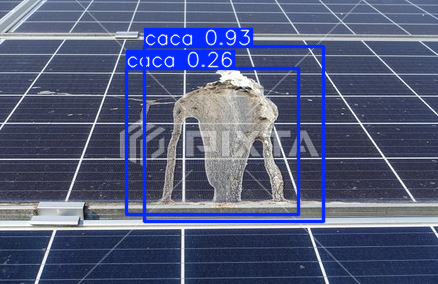

In [ ]:
# Imágenes con buenas segmentaciones: 12, 28, 41
preds[12].show()

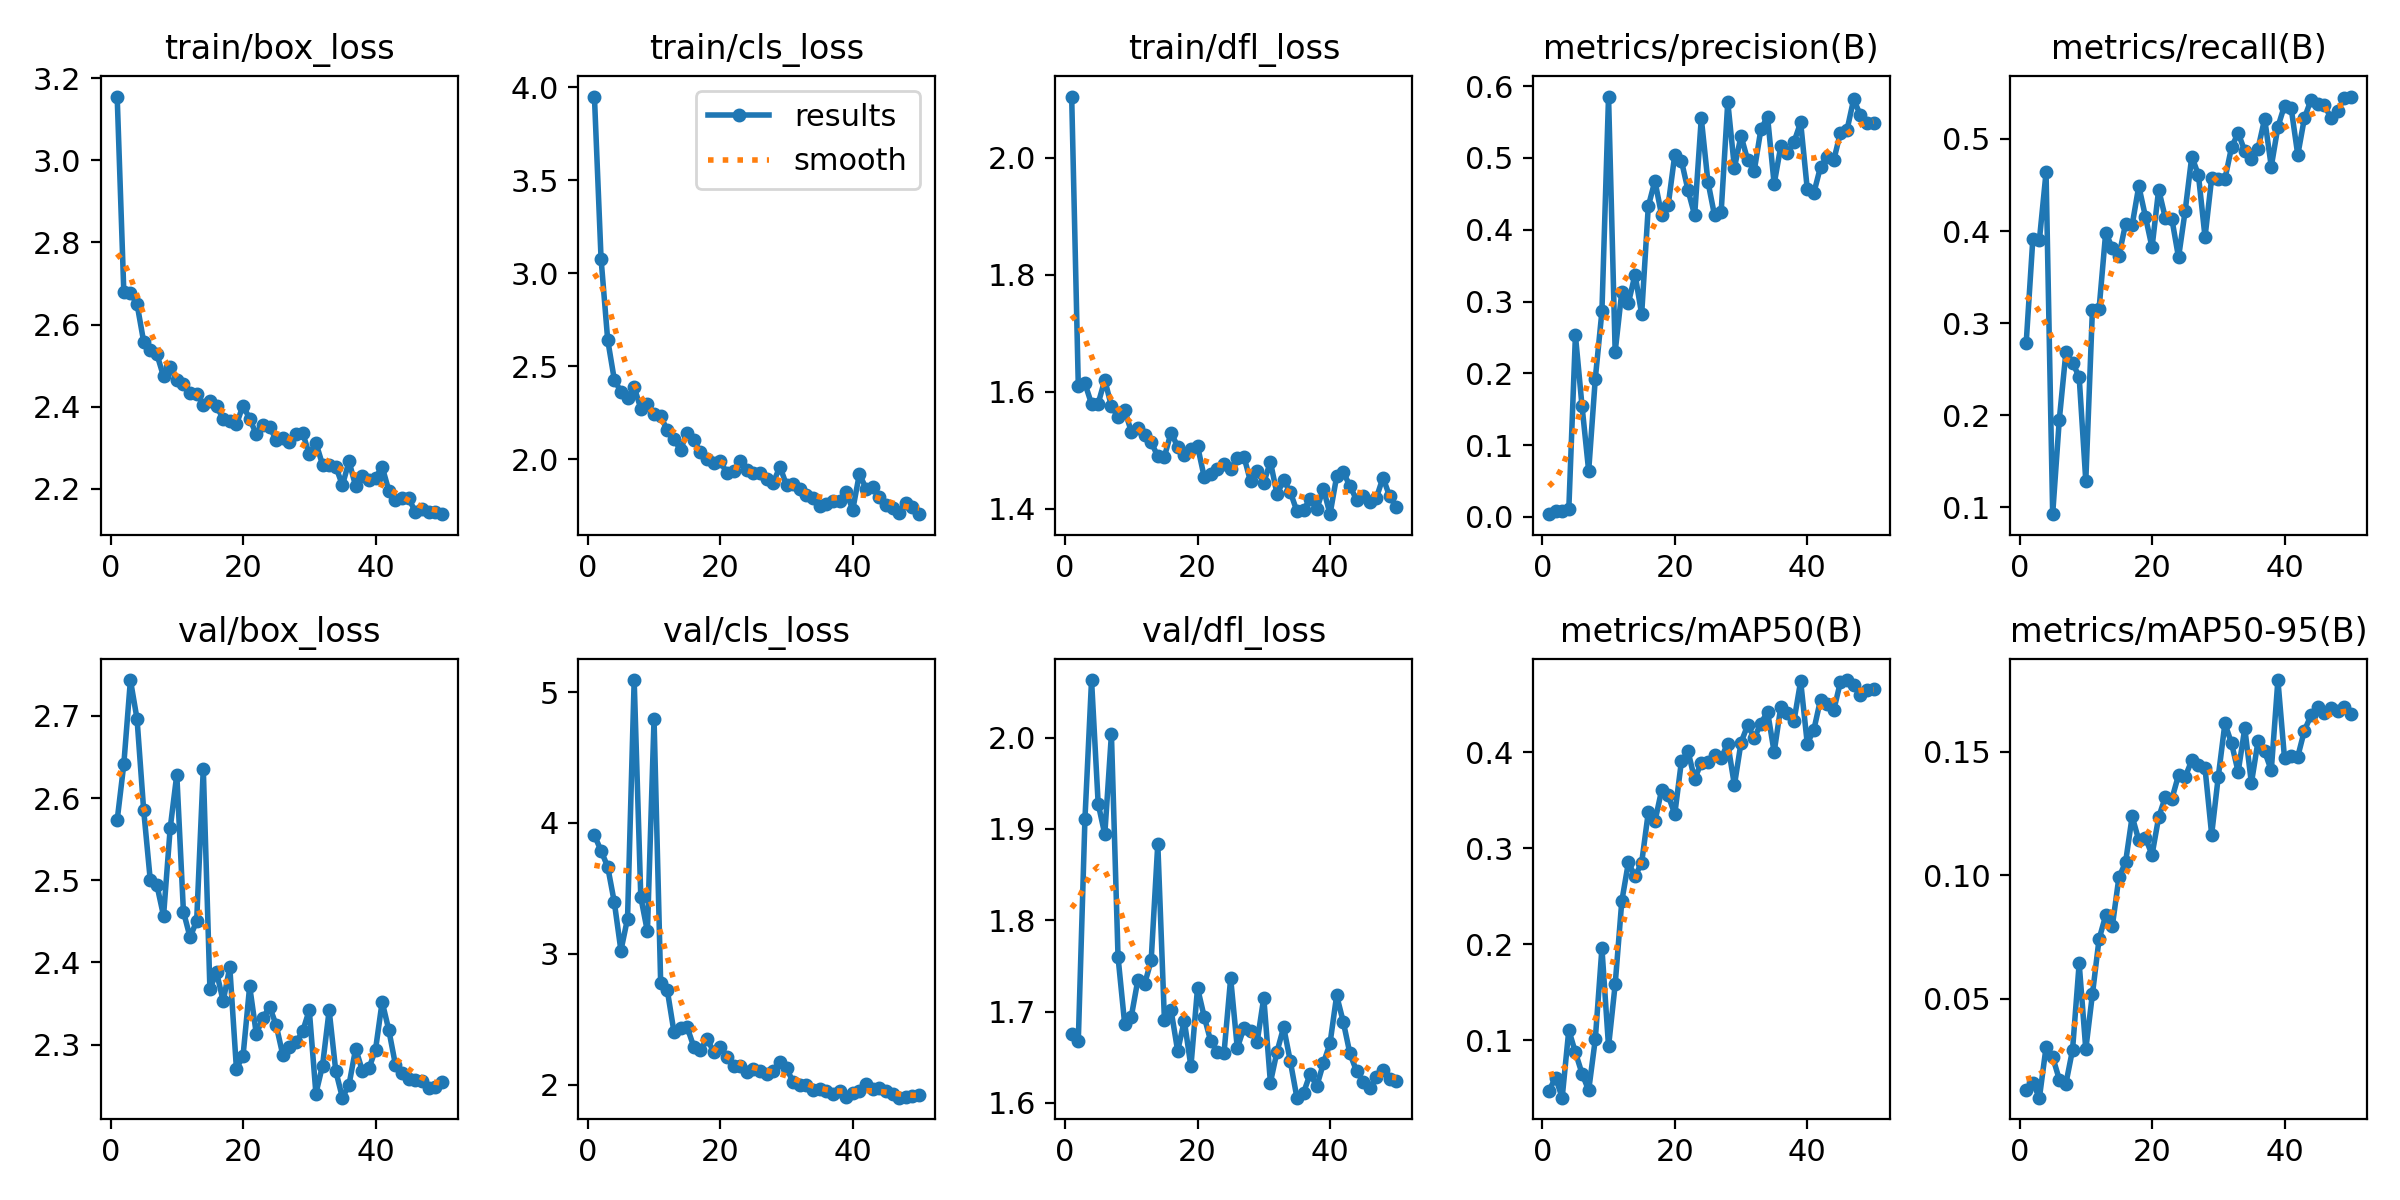

In [ ]:
#Metricas - Curvas ROC
from IPython.display import Image as IPyImage

IPyImage(filename='/content/runs/detect/paneles_yolo11n_aug_fixed6/results.png', width=800)